# Часть 1. Проверка гипотезы в Python и составление аналитической записки

Вы предобработали данные в SQL, и теперь они готовы для проверки гипотезы в Python. Загрузите данные пользователей из Москвы и Санкт-Петербурга c суммой часов их активности из файла yandex_knigi_data.csv. Если работаете локально, скачать файл можно по ссылке.

Проверьте наличие дубликатов в идентификаторах пользователей. Сравните размеры групп, их статистики и распределение.

Напомним, как выглядит гипотеза: пользователи из Санкт-Петербурга проводят в среднем больше времени за чтением и прослушиванием книг в приложении, чем пользователи из Москвы. Попробуйте статистически это доказать, используя одностороннюю проверку гипотезы с двумя выборками:

Нулевая гипотеза $H_0: \mu_{\text{СПб}} \leq \mu_{\text{Москва}}$ <br> Среднее время активности пользователей в Санкт-Петербурге не больше, чем в Москве.

Альтернативная гипотеза $H_1: \mu_{\text{СПб}} > \mu_{\text{Москва}}$ <br> Среднее время активности пользователей в Санкт-Петербурге больше, и это различие статистически значимо.

По результатам анализа данных подготовьте аналитическую записку, в которой опишите:

Выбранный тип t-теста и уровень статистической значимости.

Результат теста, или p-value.

Вывод на основе полученного p-value, то есть интерпретацию результатов.

Одну или две возможные причины, объясняющие полученные результаты.

## Проверка гипотезы в Python и составление аналитической записки

- Автор: Мулашкина Татьяна
- Дата: 10.06.2025

## Цели и задачи проекта

<b> Цель проекта: </b> проверить гипотезу, что пользователи из Санкт-Петербурга проводят в среднем больше времени за чтением и прослушиванием книг в приложении по сравнению с пользователями из Москвы. <br>

<b> Задачи проекта: </b> </br>
- Проверить наличие дубликатов в идентификаторах пользователей;
- Сравнить размеры групп и их статистики;
- Используя одностороннюю проверку гипотезы с двумя выборками, проверить гипотезу;
- По результатам анализа подготовить аналитическую заметку.

## Описание данных
Данны были предобработанны с помощью SQL и содержатся в таблице yandex_knigi_data.csv

- `city` — город пользователя (Москва или Санкт-Петербург);
- `puid` — идентификатор пользователя;
- `hours` — общее количество часов активности (вычисляется по полю hours).


## Содержимое проекта

1) Загрузка данных и знакомство с ними
2) Проверка гипотезы в Python
3) Аналитическая записка

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_ind
from scipy.stats import mannwhitneyu
from statsmodels.stats.power import NormalIndPower
import statsmodels.stats.api as sms
from statsmodels.stats.proportion import proportions_ztest

## 1. Загрузка данных и знакомство с ними

Загрузите данные пользователей из Москвы и Санкт-Петербурга c их активностью (суммой часов чтения и прослушивания) из файла `/datasets/yandex_knigi_data.csv`.

In [2]:
#yandex_knigi = pd.read_csv('datasets/yandex_knigi_data.csv')
yandex_knigi = pd.read_csv('/datasets/yandex_knigi_data.csv')

In [3]:
yandex_knigi.head()

,Unnamed: 0,city,puid,hours
0,0,Москва,9668,26.167776
1,1,Москва,16598,82.111217
2,2,Москва,80401,4.656906
3,3,Москва,140205,1.840556
4,4,Москва,248755,151.326434


In [4]:
empty_values = yandex_knigi[['city','puid', 'hours']].isna().sum()

print('Количество пропущенных значений в столбцах city, puid и hours датафрейма yandex_knigi:')
empty_values

Количество пропущенных значений в столбцах city, puid и hours датафрейма yandex_knigi:


city     0
puid     0
hours    0
dtype: int64

In [5]:
full_diplicates = yandex_knigi.duplicated().sum()

print(f'Количество полных дубликатов в датафрейме yandex_knigi: {full_diplicates}')

Количество полных дубликатов в датафрейме yandex_knigi: 0


In [6]:
puid_duplicates = yandex_knigi.duplicated(subset = 'puid').sum()

print(f'Количество дубликатов в столбце puid датафрейма yandex_knigi: {puid_duplicates}')

Количество дубликатов в столбце puid датафрейма yandex_knigi: 244


In [7]:
yandex_knigi[yandex_knigi.duplicated(subset=['puid'], keep=False)].sort_values(by = 'puid')

,Unnamed: 0,city,puid,hours
35,35,Москва,2637041,10.317371
6247,6247,Санкт-Петербург,2637041,3.883926
134,134,Москва,9979490,32.415573
6274,6274,Санкт-Петербург,9979490,1.302997
145,145,Москва,10597984,42.931506
...,...,...,...,...
6195,6195,Москва,1130000020425037,0.310556
8775,8775,Санкт-Петербург,1130000023864516,14.384722
6202,6202,Москва,1130000023864516,142.830085
6210,6210,Москва,1130000028554332,11.277554


In [8]:
yandex_knigi = yandex_knigi.drop_duplicates(subset = 'puid', keep = False)

In [9]:
yandex_knigi[yandex_knigi.duplicated(subset=['puid'], keep=False)].sort_values(by = 'puid')

,Unnamed: 0,city,puid,hours


In [10]:
print("Сравним размеры групп:")
yandex_knigi.groupby('city')['puid'].count().reset_index()

Сравним размеры групп:


,city,puid
0,Москва,5990
1,Санкт-Петербург,2306


In [11]:
print('Статистические показатели столбца hours для Москвы:')
yandex_knigi[yandex_knigi['city'] == 'Москва']['hours'].describe()

Статистические показатели столбца hours для Москвы:


count    5990.000000
mean       10.848192
std        36.925622
min         0.000022
25%         0.057042
50%         0.888232
75%         5.933439
max       857.209373
Name: hours, dtype: float64

In [12]:
print('Статистические показатели столбца hours для Санкт-Петербурга:')
yandex_knigi[yandex_knigi['city'] == 'Санкт-Петербург']['hours'].describe()

Статистические показатели столбца hours для Санкт-Петербурга:


count    2306.000000
mean       11.264433
std        39.831755
min         0.000025
25%         0.060173
50%         0.875355
75%         6.138424
max       978.764775
Name: hours, dtype: float64

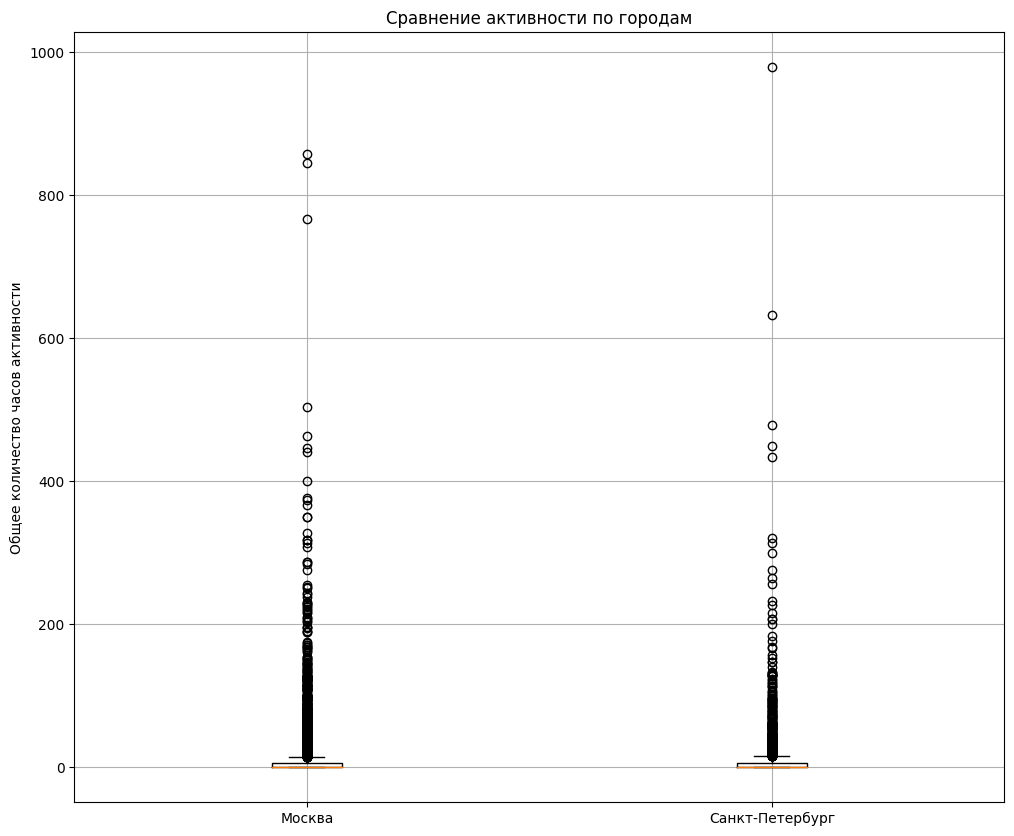

In [13]:
moscow_data = yandex_knigi[yandex_knigi['city'] == 'Москва']['hours']
spb_data = yandex_knigi[yandex_knigi['city'] == 'Санкт-Петербург']['hours']

plt.figure(figsize=(12, 10))
plt.boxplot([moscow_data, spb_data], labels=['Москва', 'Санкт-Петербург'])
plt.title('Сравнение активности по городам')
plt.ylabel('Общее количество часов активности')
plt.grid(True)
plt.show()

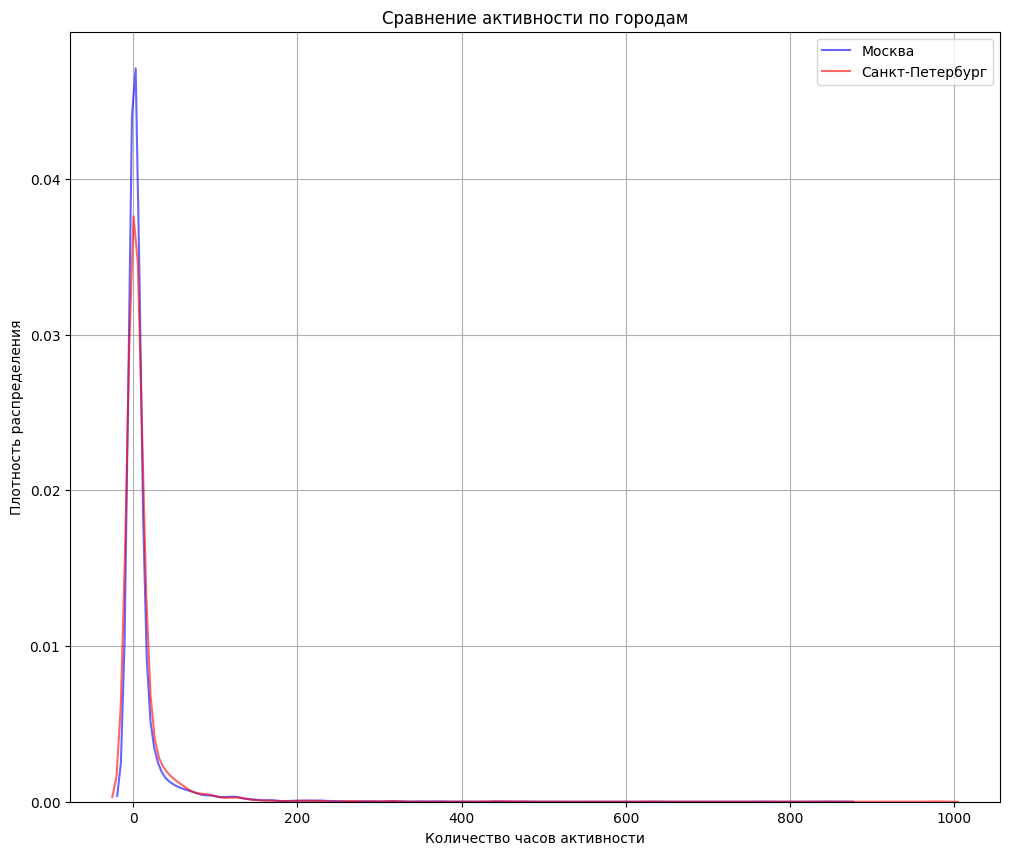

In [14]:
plt.figure(figsize=(12, 10))
#plt.hist(moscow_data, density = True, color='blue', alpha = 0.6, label='Москва', edgecolor='black')
#plt.hist(spb_data, density = True, color='red', alpha = 0.6, label='Санкт-Петербург', edgecolor='black')
sns.kdeplot(moscow_data, color='blue', alpha = 0.6, label='Москва')
sns.kdeplot(spb_data, color='red', alpha = 0.6, label='Санкт-Петербург')
plt.title('Сравнение активности по городам')
plt.xlabel('Количество часов активности')
plt.ylabel('Плотность распределения')
plt.grid(True)
plt.legend()
plt.show()

Наблюдаются выбросы в интервале от 300 до 900 часов. Оставим значения, которые будут меньше 99%-го процентиля этого ряда значений или равны ему. 

In [15]:
cleaned_moscow_data = moscow_data[moscow_data <= moscow_data.quantile(0.99)]
cleaned_spb_data = spb_data[spb_data <= spb_data.quantile(0.99)]

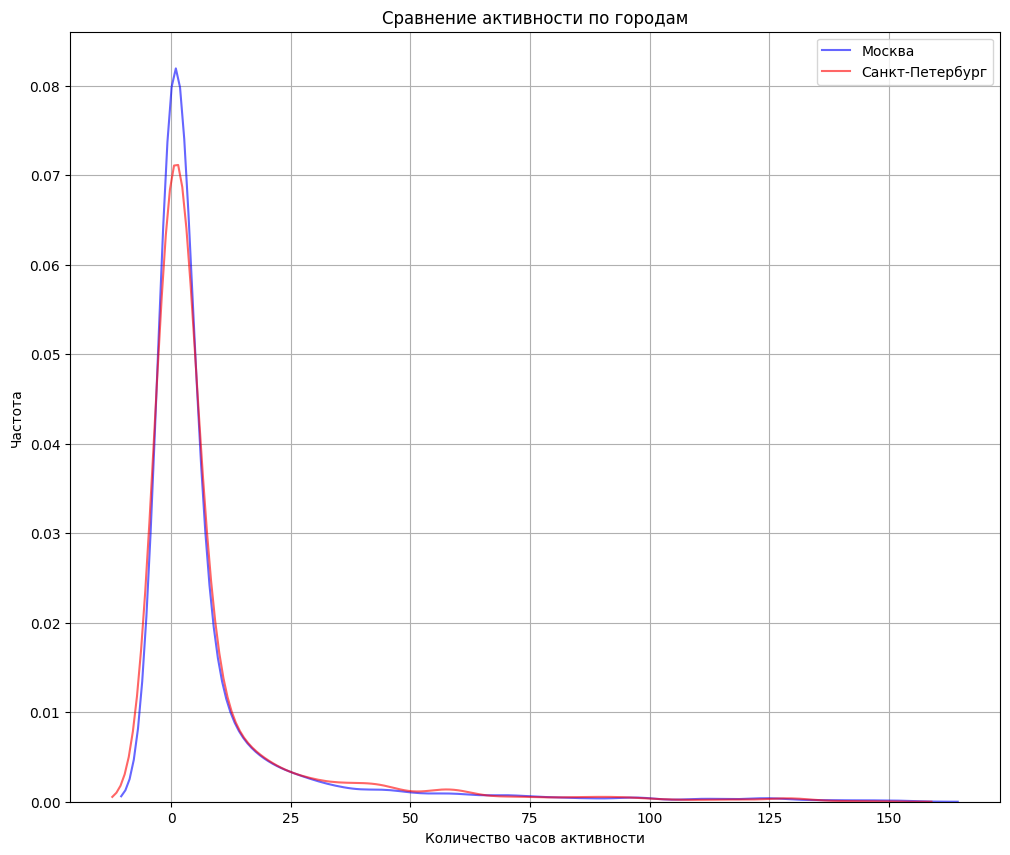

In [16]:
plt.figure(figsize=(12, 10))
sns.kdeplot(cleaned_moscow_data, color='blue', alpha = 0.6, label='Москва')
sns.kdeplot(cleaned_spb_data, color='red', alpha = 0.6, label='Санкт-Петербург')
plt.legend()
plt.title('Сравнение активности по городам')
plt.xlabel('Количество часов активности')
plt.ylabel('Частота')
plt.grid(True)
plt.show()

In [17]:
print(f'Дисперсия данных по Москве {round(cleaned_moscow_data.var(), 2)}') 
print(f'Дисперсия данных по Санкт-Петербургу {round(cleaned_spb_data.var(),2)}')

Дисперсия данных по Москве 392.95
Дисперсия данных по Санкт-Петербургу 371.85


#### Промежуточные выводы:
1) Данные не содержат пропусков
2) Данные не содержат полных дубликатов
3) В индефикаторах пользоватей содержатся 244 дубликата. Анализ данных дубликатов, показал, что у дублирующихся индефикаторах пользователей разные города, что может быть связано, с тем, что пользователей пользовался приложением в разное время находять в Санкт-Петербурге и в Москве. Для того, чтобы была независимость данных, дубликаты были удаленны.
4) Данных по Москве (5990 пользователя) значительно больше чем данных по Санкт-Петербургу (2306 пользователей)
5) Среднее количество часов для Санкт-Петербурга (11.3) больше чем для Москвы (10.8). Также для данных обоих городов наблюдается большое стандратное отклонение (39.8 и 36.9 соответсвенно). А также видно, что данные содержат выбросы.
6) Были выделены данные, в которых значения меньше 99%-го процентиля этого ряда значений или равны ему, чтобы избежать работу с выбросами.
7) Дисперсии данных по Москве и Санкт-Петербургу различаются и составляют соответсвенно 392.95 и 371.9, а также выборки сильно отличаются по размеру, значит нужно применить t-тест Уэлча.
8) Кроме того, так как наблюдается большое количество выбросов, которые не до конца отфильтровались при удалении по 99%-ному процентилю, лучше применить тест Манна-Уитни.

## 2. Проверка гипотезы в Python

Гипотеза звучит так: пользователи из Санкт-Петербурга проводят в среднем больше времени за чтением и прослушиванием книг в приложении, чем пользователи из Москвы. Попробуйте статистически это доказать, используя одностороннюю проверку гипотезы с двумя выборками:

- <b>Нулевая гипотеза</b> $H_0: \mu_{\text{СПб}} \leq \mu_{\text{Москва}}$ <br> Среднее время активности пользователей в Санкт-Петербурге не больше, чем в Москве.

- <b>Альтернативная гипотеза</b> $H_1: \mu_{\text{СПб}} > \mu_{\text{Москва}}$ <br> Среднее время активности пользователей в Санкт-Петербурге больше, и это различие статистически зн

Применим t-тест Уэлча для проверки гипотезы с уровнем значимости alpha = 0.05

In [18]:
test_result = ttest_ind(cleaned_spb_data, 
                        cleaned_moscow_data, 
                        equal_var = False, 
                        alternative='greater')

alpha = 0.05

print(f'Значение p-value: {round(test_result.pvalue, 2)}')
if test_result.pvalue > alpha:
    print(f'p-value = {round(test_result.pvalue, 2)} > {alpha}')
    print('Не получилось отвергнуть нулевую гипотезу')
else:
    print(f'p-value = {round(test_result.pvalue, 2)} < {alpha}')
    print('Отвергаем нулевую гипотезу') 


Значение p-value: 0.37
p-value = 0.37 > 0.05
Не получилось отвергнуть нулевую гипотезу


Так как размеры выборок сильно отличаются, применим дополнительно тест Манна-Уитни

In [19]:
alpha = 0.05
mw_test = mannwhitneyu(
    cleaned_spb_data, 
    cleaned_moscow_data, 
    alternative='greater' 
)
if mw_test.pvalue > alpha:
    print(f'pvalue={round(mw_test.pvalue, 4)} > {alpha}')
    print('Нулевая гипотеза находит подтверждение! Распределения метрики в группах Москва и Санкт-Петербург равны')
else:
    print(f'pvalue={round(mw_test.pvalue, 4)} < {alpha}')
    print('Нулевая гипотеза не находит подтверждения! Распределения метрики в группах Москва и Санкт-Петербург различаются')

pvalue=0.4635 > 0.05
Нулевая гипотеза находит подтверждение! Распределения метрики в группах Москва и Санкт-Петербург равны


t-тест в качестве условия требует нормального распределения выборочного среднего, то есть у распределения не должно быть тяжёлых хвостов и выбросов. У теста Манна — Уитни таких требований нет, и он нечувствителен к выбросам из-за рангового преобразования. Неустойчивость t-теста к выбросам может привести к ошибке второго рода. Чтобы избежать таких ошибок, можно использовать оба теста при анализе результатов эксперимента. В большинстве случаев тесты покажут одинаковый результат с точки зрения принятия или отвержения нулевой гипотезы. Однако для надёжности можно совершать эту проверку, чтобы исключить вероятность влияния выбросов на результат t-теста. <br>
Поэтому, в связи с тем, что данные содержат выбросы и правый хвост на распределении, было принято решение провести два теста t-тест Уэлча и тест Манна-Уитни. Оба теста дали одинаковый результат и подтвердили нулевую гипотезу.

## 3. Аналитическая записка
По результатам анализа данных подготовьте аналитическую записку, в которой опишете:

- Выбранный тип t-теста и уровень статистической значимости.

- Результат теста, или p-value.

- Вывод на основе полученного p-value, то есть интерпретацию результатов.

- Одну или две возможные причины, объясняющие полученные результаты.



1) Для проверки гипотезы, что пользователи из Санкт-Петербурга проводят в среднем больше времени за чтением и прослушиванием книг в приложении, чем пользователи из Москвы использовали односторонний t-тест Уэлча с уровнем значимости 0.05. Кроме того, дополнительно было проведено тестирование методом Манна-Уитни с таким же уровнем значимости.
2) p-value в случае t-теста составил 0.37, в случае теста Манна-Уитни 0.46
3) Полученные значения p-value больше чем уровень значимости alpha = 0.05, что не позволяет отвергнуть нулевую гипотезу (равенство времени чтения в Санкт-Петербурге и Москве), таким образом нельзя сказать, что в каком-то из городов пользователи проводят больше времени за чтением и прослушиванием книг в приложении
4) Возможные причины такого результата:
- Недостаточная разница между группами. Возможно, разница в активности между Москвой и Санкт-Петербургом действительно незначительна.
- Недостаточный размер выборки. Данных по Санкт-Петербургу значительно меньше чем для Москвы
- Высокая вариативность данных. В данных наблюдаются выбросы, даже с ограничением данных по 99% процентилю

----

# Часть 2. Анализ результатов A/B-тестирования

Теперь вам нужно проанализировать другие данные. Представьте, что к вам обратились представители интернет-магазина BitMotion Kit, в котором продаются геймифицированные товары для тех, кто ведёт здоровый образ жизни. У него есть своя целевая аудитория, даже появились хиты продаж: эспандер со счётчиком и напоминанием, так и подстольный велотренажёр с Bluetooth.

В будущем компания хочет расширить ассортимент товаров. Но перед этим нужно решить одну проблему. Интерфейс онлайн-магазина слишком сложен для пользователей — об этом говорят отзывы.

Чтобы привлечь новых клиентов и увеличить число продаж, владельцы магазина разработали новую версию сайта и протестировали его на части пользователей. По задумке, это решение доказуемо повысит количество пользователей, которые совершат покупку.

Ваша задача — провести оценку результатов A/B-теста. В вашем распоряжении:

* данные о действиях пользователей и распределении их на группы,

* техническое задание.

Оцените корректность проведения теста и проанализируйте его результаты.

## 1. Опишите цели исследования.



Оценить корректность проведения A/B теста и проанализируйте его результаты. Гипотеза которого заключается в следующем: упрощение интерфейса приведёт к тому, что в течение семи дней после регистрации в системе конверсия зарегистрированных пользователей в покупателей увеличится как минимум на три процентных пункта.

## 2. Загрузите данные, оцените их целостность.


In [3]:
participants = pd.read_csv('https://code.s3.yandex.net/datasets/ab_test_participants.csv')
events = pd.read_csv('https://code.s3.yandex.net/datasets/ab_test_events.zip',
                     parse_dates=['event_dt'], low_memory=False)

In [4]:
participants.head()

,user_id,group,ab_test,device
0,0002CE61FF2C4011,B,interface_eu_test,Mac
1,001064FEAAB631A1,B,recommender_system_test,Android
2,001064FEAAB631A1,A,interface_eu_test,Android
3,0010A1C096941592,A,recommender_system_test,Android
4,001E72F50D1C48FA,A,interface_eu_test,Mac


In [5]:
participants.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14525 entries, 0 to 14524
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   user_id  14525 non-null  object
 1   group    14525 non-null  object
 2   ab_test  14525 non-null  object
 3   device   14525 non-null  object
dtypes: object(4)
memory usage: 454.0+ KB


In [6]:
full_diplicates = participants.duplicated().sum()

print(f'Количество полных дубликатов в датафрейме participants: {full_diplicates}')

Количество полных дубликатов в датафрейме participants: 0


In [7]:
events.head()

,user_id,event_dt,event_name,details
0,GLOBAL,2020-12-01 00:00:00,End of Black Friday Ads Campaign,ZONE_CODE15
1,CCBE9E7E99F94A08,2020-12-01 00:00:11,registration,0.0
2,GLOBAL,2020-12-01 00:00:25,product_page,NaN
3,CCBE9E7E99F94A08,2020-12-01 00:00:33,login,NaN
4,CCBE9E7E99F94A08,2020-12-01 00:00:52,product_page,NaN


In [8]:
events.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 787286 entries, 0 to 787285
Data columns (total 4 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   user_id     787286 non-null  object        
 1   event_dt    787286 non-null  datetime64[ns]
 2   event_name  787286 non-null  object        
 3   details     249022 non-null  object        
dtypes: datetime64[ns](1), object(3)
memory usage: 24.0+ MB


In [9]:
full_diplicates = events.duplicated().sum()

print(f'Количество полных дубликатов в датафрейме events: {full_diplicates}')

Количество полных дубликатов в датафрейме events: 36318


In [10]:
events = events.drop_duplicates()

In [11]:
full_diplicates = events.duplicated().sum()

print(f'Количество полных дубликатов в датафрейме events: {full_diplicates}')

Количество полных дубликатов в датафрейме events: 0


#### Промежуточные выводы
1) Датасет participants не содержит пропущенных значений и полных дубликатов
2) Датасет events содержит пропущенные значения в колонке details, а также содержит 36318 полных дубликатов. Дубликаты были удалены.

## 3. По таблице `ab_test_participants` оцените корректность проведения теста:

   3\.1 Выделите пользователей, участвующих в тесте, и проверьте:

   - соответствие требованиям технического задания,

   - равномерность распределения пользователей по группам теста,

   - отсутствие пересечений с конкурирующим тестом (нет пользователей, участвующих одновременно в двух тестовых группах).

In [12]:
participants['group'].unique()

array(['B', 'A'], dtype=object)

In [13]:
participants['ab_test'].unique()

array(['interface_eu_test', 'recommender_system_test'], dtype=object)

В данных содержится результаты другого тестирование 'recommender_system_test'. Проверим есть ли пользователи, которые учавствовали в обоих тестах.

In [17]:
interface_test = participants[(participants['ab_test'] == 'interface_eu_test') & (participants['group'] == 'B')]['user_id']
recommender_test = participants[(participants['ab_test'] == 'recommender_system_test') & (participants['group'] == 'B')]['user_id']

intersection = list(set(interface_test) & set(recommender_test))
print(f'Количество пользователей, которые попали в оба теста:{len(intersection)}')
print(intersection) 

Количество пользователей, которые попали в оба теста:116
['63F5FC15B31DB5A6', '8FC9D1BB3017BE66', 'F8564F547AFFC0B9', 'CF03E97B314C5632', 'EF449601C94D2496', 'E68002AA33773AD5', 'D1DFCE26FF3C713F', '4CF756542084F860', 'FEA0C585A53E7027', '6610064A4B2303D1', 'EA8341F38EFFE04C', '0C2E77C6A381704A', '75013CAAF42E90A9', '3F52D53AB33C9FD6', 'F71DD44DAB783CEB', '894A2506B3A50D03', '739656E0D7B50B30', '902F92052587344F', '94464DF2E5398E26', '886E52074D084B18', '65A30CEC01FAB999', 'BEF16764A13AEC34', '8FF91E21E27A330D', 'E3780F6861A69868', '8C69C35FB5E142F8', '115ABCFDBDDB5950', 'C0924D3FF1BEAA05', 'A35BD08F60AC00B8', '067D05BD30F04F2E', '502902B3C32C72FF', '23E633E92EDCD195', 'E0272BC86CC88DC7', 'E391353FC3A4056D', 'CA6F4DAED160E5B1', '3FAA6AD64C3B47E8', 'E7CC63BF20618321', '84AAB026310D49C4', 'BBE0583F0240AABB', '0FBF679EA1340786', 'FFF28D02B1EACBE1', 'C1E43A9B1D675927', '4FE90CB247C78EC5', 'B3059CB4FD2DE0FA', '13AA9B89A2885F8E', '1D831F7D0F539AFA', '30DEB75B33B92DC8', '2D6A6472D7F46812', '1

Так как обнаружены пользователи, относящиеся к двум тестам мы нее сможем оценить эффект от нововведения, так как не сможем понять, под воздействием какого нововведения было совершено целевое событие - от изменений в нашем тесте или в конкурирующем. Таких пользователей лучше всего удалить для корректной оценки метрик нашего теста.

In [18]:
participants = participants[~participants['user_id'].isin(intersection)] 

Оставим данные относящиеся только к нужному тесту:

In [19]:
participants = participants[participants['ab_test'] == 'interface_eu_test'] 

In [20]:
print('Количество пользователей в группе А и В соответственно:')
participants[participants['group'] == 'A']['user_id'].nunique(), participants[participants['group'] == 'B']['user_id'].nunique() 

Количество пользователей в группе А и В соответственно:


(5383, 5351)

In [21]:
test_group = participants.groupby('group')['user_id'].nunique()
A = test_group.iloc[0]
B = test_group.iloc[1]
P = round(100 * abs(A-B) / A, 2)
print(f'Процентная разница в количестве пользователей в группах A и B: {P}%')

Процентная разница в количестве пользователей в группах A и B: 0.59%


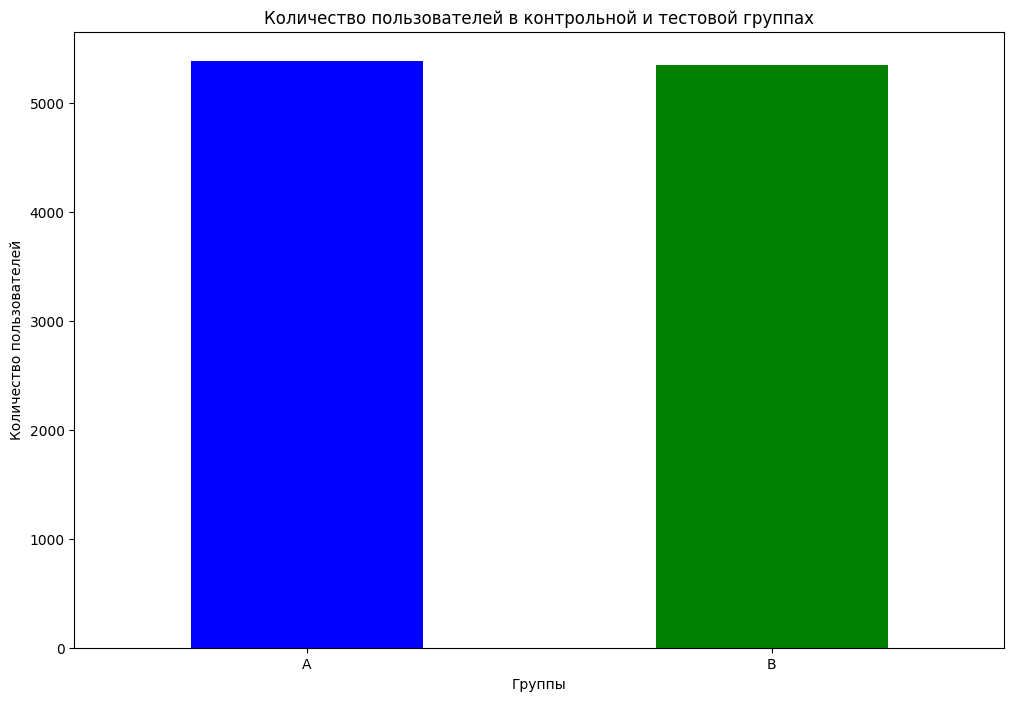

In [22]:
plt.figure(figsize=(12, 8))
participants.groupby('group')['user_id'].nunique().plot(kind='bar',
                                                                  color = ['blue', 'green'],
                                                                  rot = 0,
                                                                  xlabel = 'Группы',
                                                                  ylabel = 'Количество пользователей',
                                                                  title = 'Количество пользователей в контрольной и тестовой группах')
plt.show()

Полезно также убедиться в том, что пользователи равномерно распределены по всем доступным категориальным переменным (типу устройства). Для это построим диаграммы:

C:\Users\arxip\AppData\Local\Temp\ipykernel_25168\3507585144.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  group_A['rat'] = group_A['user_id'] / group_A['user_id'].sum()
C:\Users\arxip\AppData\Local\Temp\ipykernel_25168\3507585144.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  group_B['rat'] = group_B['user_id'] / group_B['user_id'].sum()


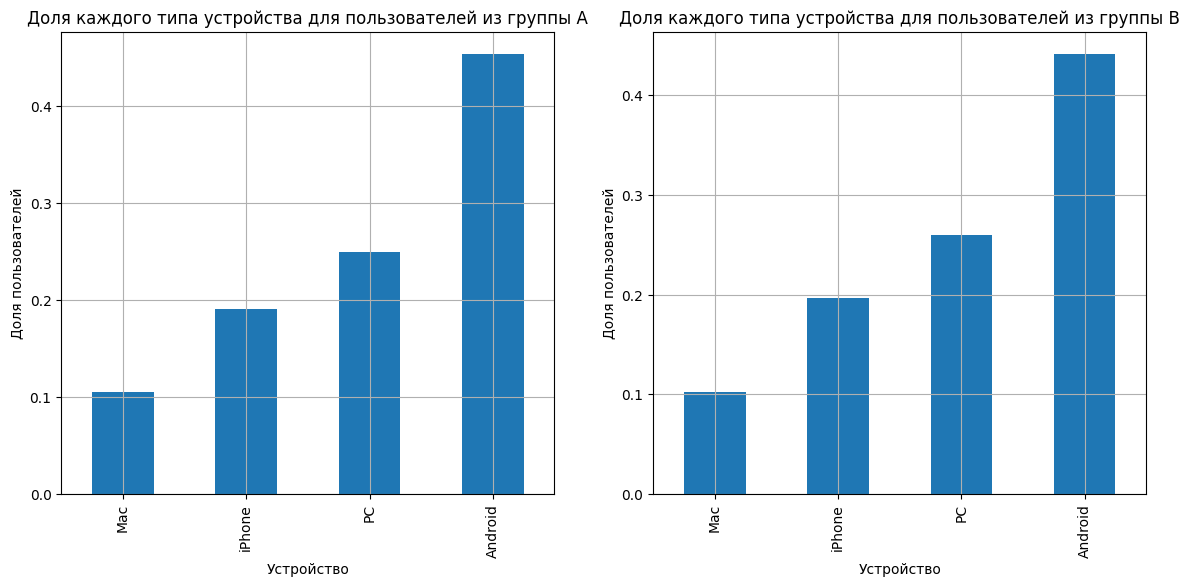

In [23]:
unique_users = participants.groupby(['group', 'device'])['user_id'].nunique().reset_index()


group_A = unique_users[unique_users['group'] == 'A']
group_B = unique_users[unique_users['group'] == 'B']


fig, axs = plt.subplots(1, 2, figsize=(14, 6))  

group_A['rat'] = group_A['user_id'] / group_A['user_id'].sum()
axs[0] = group_A.sort_values(by='rat').plot(
    kind='bar', 
    x='device', 
    y='rat', 
    legend=False, 
    grid=True,
    xlabel='Устройство', 
    ylabel='Доля пользователей', 
    title='Доля каждого типа устройства для пользователей из группы A',
    ax=axs[0]  
)


group_B['rat'] = group_B['user_id'] / group_B['user_id'].sum()
axs[1] = group_B.sort_values(by='rat').plot(
    kind='bar', 
    x='device', 
    y='rat', 
    legend=False, 
    grid=True,
    xlabel='Устройство', 
    ylabel='Доля пользователей', 
    title='Доля каждого типа устройства для пользователей из группы B',
    ax=axs[1]  
)

plt.show()

- Обнаружены различия в количестве пользователей в двух группах. Однако, можно сказать, что данное разлие на текущем этапе не значительно, так как состаляет менее 1%.
- Распределение пользователей по использованным устройства одинаково для контрольной и тестовой групп

In [24]:
A = participants[participants['group'] == 'A']['user_id']
B = participants[participants['group'] == 'B']['user_id']

intersection = list(set(A) & set(B))
print(f'Количество пользователей, которые попали в обе группы:{len(intersection)}')
print(intersection) 

Количество пользователей, которые попали в обе группы:0
[]


3\.2 Проанализируйте данные о пользовательской активности по таблице `ab_test_events`:

- оставьте только события, связанные с участвующими в изучаемом тесте пользователями;

In [25]:
events.head()

,user_id,event_dt,event_name,details
0,GLOBAL,2020-12-01 00:00:00,End of Black Friday Ads Campaign,ZONE_CODE15
1,CCBE9E7E99F94A08,2020-12-01 00:00:11,registration,0.0
2,GLOBAL,2020-12-01 00:00:25,product_page,NaN
3,CCBE9E7E99F94A08,2020-12-01 00:00:33,login,NaN
4,CCBE9E7E99F94A08,2020-12-01 00:00:52,product_page,NaN


In [26]:
user_id = list(set(participants['user_id']))
events = events[events['user_id'].isin(user_id)] 
events.info()

<class 'pandas.core.frame.DataFrame'>
Index: 72935 entries, 64672 to 780371
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   user_id     72935 non-null  object        
 1   event_dt    72935 non-null  datetime64[ns]
 2   event_name  72935 non-null  object        
 3   details     20261 non-null  object        
dtypes: datetime64[ns](1), object(3)
memory usage: 2.8+ MB


- определите горизонт анализа: рассчитайте время (лайфтайм) совершения события пользователем после регистрации и оставьте только те события, которые были выполнены в течение первых семи дней с момента регистрации;

In [27]:
events['event_name'].unique()

array(['registration', 'login', 'product_page', 'purchase',
       'product_cart'], dtype=object)

In [28]:
registration = events[events['event_name'] == 'registration'][['user_id', 'event_dt']]
registration.head()

,user_id,event_dt
64672,5F506CEBEDC05D30,2020-12-06 14:10:01
64946,51278A006E918D97,2020-12-06 14:37:25
66585,A0C1E8EFAD874D8B,2020-12-06 17:20:22
67873,275A8D6254ACF530,2020-12-06 19:36:54
67930,0B704EB2DC7FCA4B,2020-12-06 19:42:20


In [29]:
participants = participants.merge(registration, on = 'user_id', suffixes = ('','_reg'), how = 'left')

In [30]:
participants = participants.merge(registration, on = 'user_id', suffixes = ('','_reg'), how = 'left')
participants.head()

,user_id,group,ab_test,device,event_dt,event_dt_reg
0,0002CE61FF2C4011,B,interface_eu_test,Mac,2020-12-07 04:37:31,2020-12-07 04:37:31
1,001064FEAAB631A1,A,interface_eu_test,Android,2020-12-20 14:12:45,2020-12-20 14:12:45
2,001E72F50D1C48FA,A,interface_eu_test,Mac,2020-12-17 15:44:05,2020-12-17 15:44:05
3,002412F1EB3F6E38,B,interface_eu_test,Mac,2020-12-09 09:36:50,2020-12-09 09:36:50
4,002540BE89C930FB,B,interface_eu_test,Android,2020-12-08 18:06:07,2020-12-08 18:06:07


In [31]:
participants['days_since_reg'] = (participants['event_dt'] - participants['event_dt_reg']).dt.days

In [32]:
participants_test = participants[participants['days_since_reg'] < 7]

Оцените достаточность выборки для получения статистически значимых результатов A/B-теста. Заданные параметры:

- базовый показатель конверсии — 30%,

- мощность теста — 80%,

- достоверность теста — 95%.

In [33]:
#Задаём параметры
effect_size = sms.proportion_effectsize(0.3, 0.33)

#Рассчитываем размер выборки
required_n = sms.NormalIndPower().solve_power(effect_size, power=0.8, alpha=0.05, ratio=1)

print(f"Необходимый размер выборки для каждой группы: {int(required_n)}")

Необходимый размер выборки для каждой группы: 3761


In [34]:
print('Количество пользователей в группе А и В соответственно:')
participants_test[participants_test['group'] == 'A']['user_id'].nunique(), participants_test[participants_test['group'] == 'B']['user_id'].nunique() 

Количество пользователей в группе А и В соответственно:


(5383, 5351)

Необходимый размер выборки для ожидаемого изменения конверсии в 3 процентных пункта (mde = 0.03) - 3761. В проведенном тесте число пользователей в группах А и В составило 5383 и 5351 пользователей соответсвенно, что больше необходимого.

- рассчитайте для каждой группы количество посетителей, сделавших покупку, и общее количество посетителей.

In [35]:
participants_test.head()

,user_id,group,ab_test,device,event_dt,event_dt_reg,days_since_reg
0,0002CE61FF2C4011,B,interface_eu_test,Mac,2020-12-07 04:37:31,2020-12-07 04:37:31,0
1,001064FEAAB631A1,A,interface_eu_test,Android,2020-12-20 14:12:45,2020-12-20 14:12:45,0
2,001E72F50D1C48FA,A,interface_eu_test,Mac,2020-12-17 15:44:05,2020-12-17 15:44:05,0
3,002412F1EB3F6E38,B,interface_eu_test,Mac,2020-12-09 09:36:50,2020-12-09 09:36:50,0
4,002540BE89C930FB,B,interface_eu_test,Android,2020-12-08 18:06:07,2020-12-08 18:06:07,0


In [36]:
purchase = events[events['event_name'] == 'purchase'][['user_id', 'event_dt', 'event_name']]
purchase.head()

,user_id,event_dt,event_name
72018,0C16983FA25B81F0,2020-12-07 01:01:07,purchase
72122,D689DF59790EFDE1,2020-12-07 01:06:17,purchase
73176,3F3E8F21E60FC065,2020-12-07 01:56:24,purchase
74883,07D25C3D72E57529,2020-12-07 03:14:07,purchase
75022,76A9078C1094254E,2020-12-07 03:19:24,purchase


In [37]:
participants_test = participants_test.merge(purchase, on = 'user_id', suffixes = ('','_pur'), how = 'left')

In [38]:
participants_test.head()

,user_id,group,ab_test,device,event_dt,event_dt_reg,days_since_reg,event_dt_pur,event_name
0,0002CE61FF2C4011,B,interface_eu_test,Mac,2020-12-07 04:37:31,2020-12-07 04:37:31,0,NaT,NaN
1,001064FEAAB631A1,A,interface_eu_test,Android,2020-12-20 14:12:45,2020-12-20 14:12:45,0,NaT,NaN
2,001E72F50D1C48FA,A,interface_eu_test,Mac,2020-12-17 15:44:05,2020-12-17 15:44:05,0,NaT,NaN
3,002412F1EB3F6E38,B,interface_eu_test,Mac,2020-12-09 09:36:50,2020-12-09 09:36:50,0,NaT,NaN
4,002540BE89C930FB,B,interface_eu_test,Android,2020-12-08 18:06:07,2020-12-08 18:06:07,0,NaT,NaN


In [39]:
all_user_A = participants_test[participants_test['group'] == 'A']['user_id'].nunique()

pur_user_A = participants_test[(participants_test['group'] == 'A') & (participants_test['event_name'] == 'purchase')]['user_id'].nunique()

print(f'Всего пользователей в группе A: {all_user_A}')
print(f'Пользователей в группе A, совершивших покупку: {pur_user_A}')

all_user_B = participants_test[participants_test['group'] == 'B']['user_id'].nunique()

pur_user_B = participants_test[(participants_test['group'] == 'B') & (participants_test['event_name'] == 'purchase')]['user_id'].nunique()

print(f'Всего пользователей в группе B: {all_user_B}')
print(f'Пользователей в группе B, совершивших покупку: {pur_user_B}')

Всего пользователей в группе A: 5383
Пользователей в группе A, совершивших покупку: 1766
Всего пользователей в группе B: 5351
Пользователей в группе B, совершивших покупку: 1903


In [40]:
conversion_A = pur_user_A / all_user_A * 100
conversion_B = pur_user_B / all_user_B * 100
print(f'Конверсия в группе А: {round(conversion_A, 2)}%')
print(f'Конверсия в группе B: {round(conversion_B, 2)}%')
print(f'Разница конверсий в группе В и А составляет: {round(conversion_B - conversion_A, 2)}%')

Конверсия в группе А: 32.81%
Конверсия в группе B: 35.56%
Разница конверсий в группе В и А составляет: 2.76%


- сделайте предварительный общий вывод об изменении пользовательской активности в тестовой группе по сравнению с контрольной.

#### Промежуточные выводы
1) Данные содержат результаты двух тестов. В связи с этим была проведена проверка пересечения пользователей по этим двум тестам. Пользователи, учавствующие в двух тестах одновременно были удалены из данных, чтобы результаты тестирования были независимы.
2) Были отобранны данные, относящиеся к тесту 'interface_eu_test'
3) Обнаружены различия в количестве пользователей в двух группах. Однако, можно сказать, что данное разлие на текущем этапе не значительно, так как состаляет менее 1%
4) Проверено, что пользователи, относящиеся к контрольной и тестовым группах одинаково распределены по категориальным признакам (типу устройства)
5) Установлено, что выборки являются независимыми, так пересечение пользователей из тестовой и контрольной групп не наблюдается
6) Был определен горизонт анализы и оставлены только те события, которые были выполнены в течении первых 7 дней с момента регистрации
7) Необходимы размер выборки для ожидаемого изменения конверсии в 3 процентных пункта (mde = 0.03) - 3761.  В проведенном тесте число пользователей в группах А и В составило  5383 и 5351 пользователей соответсвенно, что больше необходимого.
6) Коверсия в контрольной группе составила 32.8%, в тестовой группе 35.6%, что соотвествует разнице в 2.8 процентных пункта, что чуть меньше ожидаемого результата.

## 4. Проведите оценку результатов A/B-тестирования:

- Проверьте изменение конверсии подходящим статистическим тестом, учитывая все этапы проверки гипотез.

Проеведем z-тест пропорций. <br>

<b>Нулевая гипотеза </b>
Конверсии в группах A и B равны:
pA >= pB, где p - конверсия

<b> Альтернативная гипотеза: </b>
Конверсия в группе B больше чем в группе A:
pA < pB

<div class="alert alert-success">
<h2> Комментарий ревьюера <a class="tocSkip"> </h2>

<b>Все отлично!👍:</b> Гиотезы сформулированы, но аналогично стоит скорректировать направление нулевой гипотезы.

In [41]:
stat_ztest, p_value_ztest = proportions_ztest(
    [pur_user_A, pur_user_B],
    [all_user_A, all_user_B],
    alternative='smaller' 
)

In [56]:
print(f'Значение p-value: {round(p_value_ztest, 4)}')

if p_value_ztest > alpha:
    print(f'pvalue={round(p_value_ztest, 4)} > {alpha}')
    print('Нулевая гипотеза находит подтверждение!')
else:
    print(f'pvalue={round(p_value_ztest, 4)} < {alpha}')
    print('Нулевая гипотеза не находит подтверждения!')

Значение p-value: 0.0045
pvalue=0.0045 < 0.05
Нулевая гипотеза не находит подтверждения!


<div class="alert alert-block alert-danger">
<h2> Комментарий ревьюера <a class="tocSkip"></h2>

    
<b>На доработку❌:</b> Мы сравниваем группу В с группой А - группа В должна быть в массивах на первом месте, также нужно изменить направление проверки.

<div class="alert alert-info">
<h2> Комментарий студента <a class="tocSkip"> </h2>
 Не понимаю. Альтернативная гипотеза: конверсия в группе А меньше чем конверсия в группе B. Для проверки этого я указываю alternative = 'smaller', что как раз соответсвует pA < pB. Но навсякий случай сделала и другой вариант.
</div>

<div class="alert alert-success">
<h2> Комментарий ревьюера v.2 <a class="tocSkip"> </h2>

<b>Все отлично!👍:</b> Технически ошибки в тесте действительно не было, но сама гипотеза была проверена не та, которая должна быть проверена.

Проеведем z-тест пропорций. <br>

<b>Нулевая гипотеза </b>
Конверсии в группах A и B равны:
pA >= pB, где p - конверсия

<b> Альтернативная гипотеза: </b>
Конверсия в группе B больше чем в группе A:
pA < pB

In [57]:
stat_ztest, p_value_ztest = proportions_ztest(
    [pur_user_B, pur_user_A],
    [all_user_B, all_user_A],
    alternative='larger' 
)

In [58]:
print(f'Значение p-value: {round(p_value_ztest, 4)}')

if p_value_ztest > alpha:
    print(f'pvalue={round(p_value_ztest, 4)} > {alpha}')
    print('Нулевая гипотеза находит подтверждение!')
else:
    print(f'pvalue={round(p_value_ztest, 4)} < {alpha}')
    print('Нулевая гипотеза не находит подтверждения!')

Значение p-value: 0.0045
pvalue=0.0045 < 0.05
Нулевая гипотеза не находит подтверждения!


- Опишите выводы по проведённой оценке результатов A/B-тестирования. Что можно сказать про результаты A/B-тестирования? Был ли достигнут ожидаемый эффект в изменении конверсии?

#### Выводы A/B-тестирования
1) Было проведено z-тестирование пропорций при уровни значимости alpha = 0.05. Полученное значение p-value = 0.0045 меньше установленного уровня значимости, что означает, что нулевая гипотеза (равенство конверсий в контрольной и тестовой группах одинакова) не находит подтверждение. Таким образом, мы можем принять альтернативную гипотезу, которая говорит о том, что конверсия в тестовой группе больше чем в контрольной группе и это различие статистически значимое. 
2) Установлено, что в тестовой группе, в которой пользователи использовали обновленный дизайн сайта, конверсия на 2.5 процентных пункта больше и это различие статистически значимое. Данное значение немного меньше чем ожидаемый результат (конверсия зарегистрированных пользователей в покупателей увеличится как минимум на три процентных пункта). Однако, это существенное различие близкое к ожидаемому, поэтому рекомендуется использовать обновленный дизайн сайта.

<div class="alert alert-success">
<h2> Комментарий ревьюера <a class="tocSkip"> </h2>

<b>Все отлично!👍:</b> Есть итоговый вывод с результатами теста.

<div style="border:solid Chocolate 2px; padding: 40px">

# Комментарий ревьюера: общий вывод по проекту.

Татьяна, проект получился на довольно хорошем уровне - отличная работа над проектом, молодец!

Мне нравится твой аналитический подход к выполнению проекта, ты соблюдаешь структуру работы, выполняешь её последовательно - это очень хорошо! Шаги проекта выполнены по порядку согласно плану проекта, нет смысловых и структурных ям. Важно, что не забываешь про выводы.
    
Над проектом ещё стоит поработать - есть рекомендации по дополнению некоторых твоих шагов проекта. Такие рекомендации я отметил жёлтыми комментариями. Будет здорово, если ты учтёшь их - так проект станет структурно и содержательно более совершенным.
    
Также в работе есть критические замечания. К этим замечаниям я оставил пояснительные комментарии красного цвета, в которых перечислил возможные варианты дальнейших действий. Уверен, ты быстро с этим управишься:)
    
Если о том, что нужно сделать в рамках комментариев, будут возникать вопросы - оставь их, пожалуйста, в комментариях, и я отвечу на них во время следующего ревью.
    
Также буду рад ответить на любые твои вопросы по проекту или на какие-либо другие, если они у тебя имеются - оставь их в комментариях, и я постараюсь ответить:)
    
Жду твой проект на повторном ревью. До встречи:)

<div style="border:solid Chocolate 2px; padding: 40px">

# Комментарий ревьюера: итоговый вывод по проекту.

Татьяна, все замечания учтены - проект принят!
    
Спасибо за хорошую работу над проектом, желаю успехов в дальнейшем обучении:)